# Aviation Risk Analysis: Identifying the Safest Aircraft Models

## Project Overview
The company is exploring a new business venture: purchasing and operating aircraft for both commercial and private services. Before making such a significant investment, leadership needs to understand which aircraft models present the lowest operational risk. This project uses historical accident data from the U.S. National Transportation Safety Board (NTSB) to identify the safest aircraft types and provide clear, evidence-based recommendations. The analysis focuses on real-world aviation accident records from 1962 through 2023.

## Business Understanding
The key stakeholder is the head of the new Aviation Division. Their central question is: **Which aircraft models are the safest to acquire and operate?** To answer this, we will clean and explore the NTSB accident dataset, calculate risk metrics such as fatal- or serious-injury rates, and evaluate how different aircraft characteristics, flight conditions, and operational factors contribute to accident severity. The end result will be a set of actionable insights, backed by data, that guide purchase decisions and reduce safety risks.

## Project Objectives
* Identify the aircraft makes and models with the lowest accident and fatal-injury rates in the NTSB dataset from 1962–2023.
* Analyze how factors such as number of engines, flight purpose, weather conditions, and phase of flight affect accident severity.
* Provide clear, data-backed recommendations to guide the company’s aircraft purchase and operational decisions.

### 1. Data Acquisition & Loading

In [89]:
# Import Liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
# Load Dataset
df = pd.read_csv('./NTSB_database.csv')
df.head()

,Event Id,Investigation Type,Country,Aircraft Damage,Aircraft Category,Make,Model,Amateur Built,Number Of Engines,Engine Type,...,Event Year,Publication Year,Event Month,Publication Month,Event Day,Publication Day,Date Difference,Publication Month Name,Event Month Name,Season
0,20001218X45444,Accident,United States,Destroyed,fixed wing single engine,stinson,108-3,No,1,reciprocating,...,1948,2001,10,8,24,24.0,26,August,October,Fall
1,20001218X45447,Accident,United States,Destroyed,weight-shift-control,piper,pa24-180,No,1,reciprocating,...,1962,1996,7,9,19,19.0,34,September,July,Summer
2,20061025X01555,Accident,United States,Destroyed,fixed wing single engine,cessna,172m,No,1,reciprocating,...,1974,2007,8,2,30,30.0,33,February,August,Summer
3,20001218X45448,Accident,United States,Destroyed,weight-shift-control,rockwell,112,No,1,reciprocating,...,1977,2000,6,12,19,19.0,23,December,June,Summer
4,20041105X01764,Accident,United States,Destroyed,fixed wing multi engine,cessna,501,No,2,turbo fan,...,1979,1980,8,4,2,2.0,1,April,August,Summer


In [91]:
# Initial Checks
df.shape

(87951, 45)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87951 entries, 0 to 87950
Data columns (total 45 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Event Id                      87951 non-null  object 
 1   Investigation Type            87951 non-null  object 
 2   Country                       87951 non-null  object 
 3   Aircraft Damage               87951 non-null  object 
 4   Aircraft Category             87951 non-null  object 
 5   Make                          87951 non-null  object 
 6   Model                         87951 non-null  object 
 7   Amateur Built                 87951 non-null  object 
 8   Number Of Engines             87951 non-null  int64  
 9   Engine Type                   87951 non-null  object 
 10  Far Description               87951 non-null  object 
 11  Schedule                      87951 non-null  object 
 12  Purpose Of Flight             87951 non-null  object 
 13  T

In [93]:
df.describe()

,Number Of Engines,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Longitude,Latitude,Number Of Seats,Type Aircraft,Type Engine,...,Purpose Of Flight Factorized,Make Factorized,Model Factorized,Event Year,Publication Year,Event Month,Publication Month,Event Day,Publication Day,Date Difference
count,87951.000000,87951.000000,87951.000000,87951.000000,87951.000000,87951.000000,87951.000000,87951.000000,87951.000000,87951.000000,...,87951.000000,87951.000000,87951.000000,87951.000000,87951.000000,87951.000000,87951.000000,87951.000000,87951.000000,87951.000000
mean,1.143171,0.534184,0.276881,0.316290,4.325181,-84.438795,37.456033,11.055565,7.491592,1.320224,...,1.850678,600.506009,2101.362918,1999.265455,2002.113347,6.589385,6.903799,15.728860,15.728860,2.886766
std,0.450370,3.075452,1.336561,1.793138,22.312659,46.966700,14.067686,40.533493,3.560943,0.977549,...,3.094395,1507.969996,2970.271576,11.903151,13.011296,3.061984,3.031236,8.839005,8.839005,3.544021
min,0.000000,0.000000,0.000000,0.000000,0.000000,-177.375430,-77.848335,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1948.000000,1980.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,-110.929451,33.370320,3.000000,4.000000,1.000000,...,0.000000,2.000000,111.000000,1989.000000,1992.000000,4.000000,4.000000,8.000000,8.000000,1.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,-90.664799,38.729625,4.000000,7.000000,1.000000,...,0.000000,6.000000,442.000000,1998.000000,2000.000000,7.000000,8.000000,16.000000,16.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000,-79.384030,43.207178,5.000000,12.000000,1.000000,...,3.000000,59.000000,3324.000000,2009.000000,2020.000000,9.000000,9.000000,23.000000,23.000000,3.000000
max,8.000000,270.000000,137.000000,380.000000,459.000000,179.559745,90.000000,660.000000,21.000000,14.000000,...,25.000000,7551.000000,11562.000000,2022.000000,2022.000000,12.000000,12.000000,31.000000,31.000000,38.000000


### 2. Data Understanding

We’ll keep only the fields needed to filter by time and measure safety severity by make/model. These allows us clean the data, slice recent years (2010–2022) and compute severity rates that drive buy or no-buy recommendations.


* *Event Id* — unique identifier (check duplication).
* *Event Year / Month / Day* — when it happened (time filters & trends).
* *Make* — manufacturer (compare brands).
* *Model* — specific aircraft type (model-level rankings).
* *Aircraft Category* — aircraft class (compare like-with-like).
* *Number Of Engines* — single vs multi (risk differs).
* *Engine Type* — piston / turboprop / jet / other (risk differs).
* *Aircraft Damage* — rough severity proxy (minor/substantial/destroyed).
* *Broad Phase Of Flight* — takeoff/landing/etc. (phase risk).
* *Weather Condition* — VMC/IMC etc. (weather-related risk).
* *Purpose Of Flight* *(if present)* — personal/training/commercial (ops context).
* *Injury columns* — *Total Fatal / Serious / Minor / Uninjured* (define severity).


In [94]:
# Check for missing values
(df.isna().sum()).sort_values(ascending=False).head()

City                     12
Longitude                 0
Analysis                  0
Broad Phase Of Flight     0
Weather Condition         0
dtype: int64

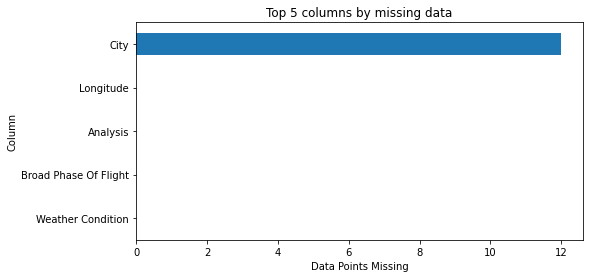

In [95]:
# Bar chart for missing values
missing_vls = (df.isna().sum()).sort_values(ascending=False).head()
missing_vls.plot(kind="barh", figsize=(8,4))
plt.xlabel("Data Points Missing")
plt.ylabel("Column")
plt.title("Top 5 columns by missing data")
plt.gca().invert_yaxis()
plt.show();

The horizontal bar chart shows the top 5 columns with the most missing values in descending order

In [96]:
# Check for duplicates in the Event ID column
df['Event Id'].duplicated().sum()

0

In [97]:
# Ensure the event date fields exist so that we can filter by time
'Event Year' in df.columns, 'Event Month' in df.columns, 'Event Day' in df.columns

(True, True, True)

In [98]:
# Check date parts are valid (no weird years, months or days)
df["Event Year"].between(1960, 2023).all()
df["Event Month"].between(1, 12).all()
df["Event Day"].between(1, 31).all()

True

In [99]:
# Unique counts for key categoricals (no NaN/blank cols needed)
cols = ["Make", "Model", "Investigation Type"]
cat_overview = pd.DataFrame(
    {"unique": [df[c].nunique(dropna=True) for c in cols]},
    index=cols
).sort_values("unique", ascending=False)
cat_overview

,unique
Model,11563
Make,7552
Investigation Type,2


In [100]:
# Engine/aircraft fields are realistic
# expect small integers, 0 is for without engine (engine-less aircraft)
mn = df["Number Of Engines"].min()
mx = df["Number Of Engines"].max()
print(f"Number Of Engines → min={mn}, max={mx}")

Number Of Engines → min=0, max=8


In [101]:
# Engine Type table
eng_type_tbl = df["Engine Type"].value_counts().reset_index()
eng_type_tbl.columns = ["Engine Type", "Count"]
print(eng_type_tbl.head(10).to_string(index=False))

     Engine Type  Count
   reciprocating  72940
      turbo prop   5357
     turbo shaft   4283
       turbo fan   2765
  without engine   1504
       turbo jet    790
         4 cycle    179
        electric     62
         2 cycle     54
 geared turbofan     12


In [102]:
# Aircraft Category table
cat_tbl = df["Aircraft Category"].value_counts().reset_index()
cat_tbl.columns = ["Aircraft Category", "Count"]
print(cat_tbl.head(10).to_string(index=False))

        Aircraft Category  Count
 fixed wing single engine  30655
                 airplane  27756
     weight-shift-control  10770
  fixed wing multi engine   5828
               rotorcraft   4008
               helicopter   3552
        powered parachute   2853
                   glider    879
                  balloon    764
                gyroplane    494


In [103]:
# check for injuries (negative counts should not happen)
injury_cols = ["Total Fatal Injuries", "Total Serious Injuries",
               "Total Minor Injuries", "Total Uninjured"]


# list of columns with any negatives
cols_with_neg = [c for c in injury_cols
                 if c in df.columns and (pd.to_numeric(df[c], errors="coerce") < 0).any()]
cols_with_neg

[]

### 3. Data Cleaning and Preparation

In [104]:
# Confirm Key numeric fields are numeric
df[["Total Fatal Injuries","Total Serious Injuries","Total Minor Injuries","Total Uninjured","Number Of Engines"]].dtypes

Total Fatal Injuries      int64
Total Serious Injuries    int64
Total Minor Injuries      int64
Total Uninjured           int64
Number Of Engines         int64
dtype: object

In [105]:
# We already have clean numeric parts: Event Year / Month / Day.
# combine them into one real datetime column for easy filtering/sorting/plotting,
# and add a simple flag to quickly focus on modern events.

# Build a proper pandas datetime from the separate parts
df["event_date"] = pd.to_datetime({
    "year":  df["Event Year"],  
    "month": df["Event Month"],  
    "day":   df["Event Day"]    
})

# Create a True/False flag for "recent" events (>= 2010)
# This is just a convenience so you can quickly subset: df_recent = df[df["recent_flag"]]
df["recent_flag"] = df["event_date"].dt.year >= 2010

# earliest and latest dates, and how many are recent
print("event_date range:", df["event_date"].min(), "→", df["event_date"].max())
print("recent_flag count:", df["recent_flag"].sum())

event_date range: 1948-10-24 00:00:00 → 2022-12-29 00:00:00
recent_flag count: 21274


In [106]:
# Tidy column headers: lowercase + remove extra spaces + replace inner spaces with underscores
df.columns = [col.strip().lower().replace(' ', '_') for col in df.columns]

In [107]:
print("Shape:", df.shape)                 
print("City missing:", df["city"].isna().sum())  

Shape: (87951, 47)
City missing: 12


In [108]:
# Drop rows with missing city (12 rows)

# Drop only rows where 'city' is NaN
# We do this because 'city' isn't critical for our analysis.
df = df.dropna(subset=["city"])
df.shape


(87939, 47)

### 4. Feature Engineering


Here we create new variables from the raw NTSB data to capture safety risk more clearly. This includes calculating severity metrics such as fatal or serious-injury rates and a weighted severity index, adding operational flags for commercial versus non-commercial flights and engine types, and generating time-based fields like yearly accident counts and seasonal categories to reveal trends and patterns.


In [109]:
# 1. Severity metrics

# Define the columns we'll use
col_make   = "make"
col_model  = "model"
col_fatal  = "total_fatal_injuries"
col_ser    = "total_serious_injuries"
col_minor  = "total_minor_injuries"


In [110]:
# Per-event flags and a weighted severity index
#  - is_fatal: at least 1 fatal injury in the event
#  - is_serious: at least 1 serious injury in the event
#  - is_severe: serious OR fatal (used for "severe rate")
#  - everity_index: 5*fatal + 3*serious + 1*minor (a simple severity score)

fatal  = pd.to_numeric(df[col_fatal], errors="coerce").fillna(0)
ser    = pd.to_numeric(df[col_ser],   errors="coerce").fillna(0)
minor  = pd.to_numeric(df[col_minor], errors="coerce").fillna(0)

df["is_fatal"]   = fatal  > 0
df["is_serious"] = ser    > 0
df["is_severe"]  = df["is_fatal"] | df["is_serious"]
df["severity_index"] = 5*fatal + 3*ser + 1*minor


In [112]:
# 3) Compute rates per aircraft model (Make–Model level)
#    - events: number of records for that model
#    - fatal_rate: share of events with any fatality
#    - severe_rate: share of events with serious OR fatal injuries
#    - avg_severity_index: average of the weighted index

grp = df.groupby([col_make, col_model], dropna=False)
model_severity = pd.concat([
    grp.size().rename("events"),
    grp["is_fatal"].mean().rename("fatal_rate"),
    grp["is_severe"].mean().rename("severe_rate"),
    grp["severity_index"].mean().rename("avg_severity_index"),
], axis=1).reset_index()

# Peek at the result
model_severity.head(10)


,make,model,events,fatal_rate,severe_rate,avg_severity_index
0,107.5 flying corporation,one design dr 107,1,1.0,1.0,5.0
1,1200,g103,1,0.0,1.0,3.0
2,177mf llc,pitts model 12,1,0.0,1.0,6.0
3,1977 colfer-chan,steen skybolt,1,0.0,0.0,1.0
4,1st ftr gp,focke-wulf 190,1,1.0,1.0,5.0
5,2000 mccoy,genesis,1,1.0,1.0,5.0
6,2001 mcgirl,questair venture,1,0.0,1.0,4.0
7,2003 nash,kitfox ii,1,0.0,0.0,1.0
8,2007 savage air llc,epic lt,1,0.0,0.0,0.0
9,2021fx3 llc,ccx-2000,2,0.0,0.0,0.0


The sections above cleans the injury-count columns, then adds easy-to-analyze flags (is_fatal, is_serious, is_severe) and a single numeric severity_index so we can group or aggregate accidents by how severe they were.

In [ ]:
# Operational features

# Goal:
# 1) Flag commercial vs non-commercial using purpose_of_flight / schedule.
# 2) Engine flags: single vs multi; reciprocating (piston) vs turbine.

# Commercial vs non-commercial
commercial_words = ["air taxi", "airline", "charter", "cargo", "part 121", "part 135"]

df["is_commercial"] = (
    purpose.str.contains("|".join(commercial_words)) |
    schedule.str.contains("|".join(commercial_words))
)

# Engine-related flags
eng_count = pd.to_numeric(df["number_of_engines"], errors="coerce")

df["is_single_engine"] = eng_count.eq(1)
df["is_multi_engine"]  = eng_count.ge(2)

eng_type = df["engine_type"].astype(str).str.lower().fillna("")
df["is_reciprocating"] = eng_type.str.contains("recip|piston")
df["is_turbine"]       = eng_type.str.contains("turboprop|turbojet|turbo fan|turbine")

print("Commercial share:", df["is_commercial"].mean().round(3))
print("Single-engine share:", df["is_single_engine"].mean().round(3))
print("Turbine share:", df["is_turbine"].mean().round(3))


Commercial share: 0.0
Single-engine share: 0.838
Turbine share: 0.031


Adds simple “operational feature” columns—commercial vs. non-commercial and key engine characteristics—so we can group or filter accidents by how the aircraft was used and powered.

In [120]:
# Time-based features

# 1) Events per year (trend table)
# Uses 'event_year' directly. If you only have 'event_date', use df['event_date'].dt.year instead.
events_per_year = (df.groupby("event_year")
                     .size()
                     .rename("events")
                     .reset_index())
events_per_year.head()

# 2) Events per decade (e.g., 1970s, 1980s, …)
df["decade"] = (df["event_year"] // 10) * 10
events_per_decade = (df.groupby("decade")
                       .size()
                       .rename("events")
                       .reset_index())
events_per_decade.head()

# 3) Seasonal counts (season already exists)
# Good for spotting time-of-year effects at a glance
season_counts = (df["season"]
                 .value_counts()
                 .rename_axis("season")
                 .reset_index(name="events"))

print(events_per_year.head(), "\n")
print(events_per_decade.head(), "\n")
print(season_counts)


   event_year  events
0        1948       1
1        1962       1
2        1974       1
3        1977       1
4        1979       2 

   decade  events
0    1940       1
1    1960       1
2    1970       4
3    1980   24312
4    1990   22661 

   season  events
0  Summer   29941
1  Spring   22204
2    Fall   20626
3  Winter   15168


We group accidents by year, decade, and season to reveal temporal patterns. Annual and decade counts show long-term trends in accident frequency, while seasonal counts highlight any time-of-year effects on aviation accidents.

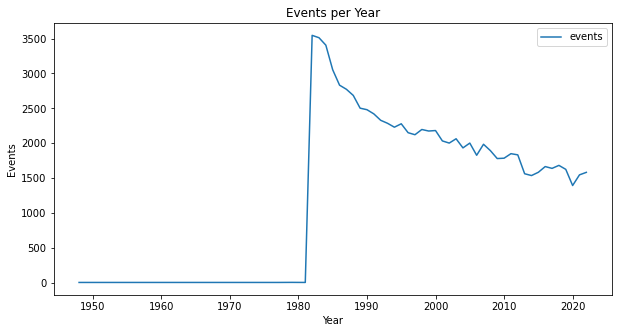

In [129]:
# Trend: events per year (line)
events_per_year.plot(x="event_year", y="events", kind="line", figsize=(10, 5))
plt.title("Events per Year")
plt.xlabel("Year")
plt.ylabel("Events")
plt.show();

The line plot shows the annual number of recorded aviation accidents. After a sharp rise when reporting became comprehensive in the early 1980s, the overall trend steadily declines, indicating a long-term improvement in aviation safety over the past four decades.

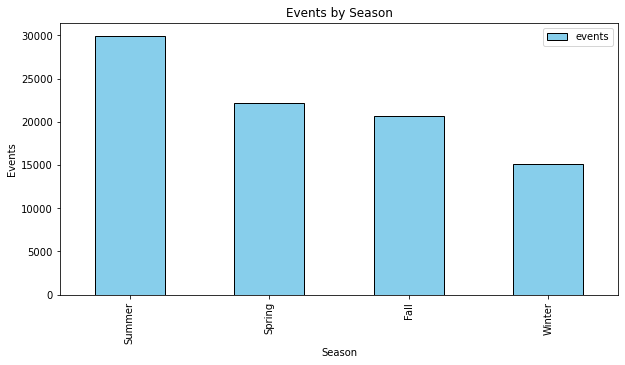

In [133]:
# Seasonality: events by season (bar)
season_counts.plot(x="season", y="events", kind="bar", edgecolor="black", color= "skyblue", figsize=(10, 5))
plt.title("Events by Season")
plt.xlabel("Season")
plt.ylabel("Events")
plt.show();

The bar chart shows how accidents vary across the year. Summer records the highest number of events, followed by spring and fall, while winter has the fewest. This suggests aviation accidents are more frequent during warmer months, possibly reflecting higher flight activity and weather patterns in that period.

### 5. Explatory Data Analysis (EDA)


In this step we explore the cleaned dataset to uncover key safety patterns. We will examine overall accident trends over time and by phase of flight, compare severity across aircraft makes, models, engine counts, and engine types, and study how flight purpose and weather conditions relate to accident outcomes. Finally, we will map accidents by state or region to highlight geographic patterns.


In [ ]:
# 1. Phase of flight

# Counts by phase (top 10)
phase_counts = (df["broad_phase_of_flight"]
                .value_counts()
                .rename_axis("broad_phase_of_flight")
                .reset_index(name="events"))
phase_counts.head(10)

,broad_phase_of_flight,events
0,Landing,27003
1,Takeoff,14547
2,Unknown,10485
3,Cruise,10472
4,Maneuvering,8444
5,Approach,7780
6,Climb,2588
7,Descent,2144
8,Taxi,2115
9,Go-around,1345


In [135]:
# Severe rate by phase
phase_severe = (df.groupby("broad_phase_of_flight")["is_severe"]
                  .mean()
                  .rename("severe_rate")
                  .reset_index()
                  .sort_values("severe_rate", ascending=False))
phase_severe.head(10)

,broad_phase_of_flight,severe_rate
6,Maneuvering,0.552582
1,Climb,0.520093
7,Other,0.508621
11,Unknown,0.467716
3,Descent,0.453358
0,Approach,0.442288
2,Cruise,0.418831
8,Standing,0.411111
4,Go-around,0.356134
9,Takeoff,0.346601


In [140]:
# 2. Aircraft characteristics (engines)

# Severity vs number of engines
eng_cnt_severe = (df.groupby("number_of_engines")["is_severe"]
                    .mean()
                    .rename("severe_rate")
                    .reset_index()
                    .sort_values("number_of_engines"))
eng_cnt_severe

,number_of_engines,severe_rate
0,0,0.412253
1,1,0.339469
2,2,0.414225
3,3,0.279762
4,4,0.291939
5,6,0.000000
6,8,0.666667


In [137]:
# Severity vs engine type
eng_type_severe = (df.groupby("engine_type")["is_severe"]
                     .mean()
                     .rename("severe_rate")
                     .reset_index()
                     .sort_values("severe_rate", ascending=False))
eng_type_severe.head(10)

,engine_type,severe_rate
4,hybrid rocket,1.000000
5,lr,1.000000
2,electric,0.693548
1,4 cycle,0.525140
0,2 cycle,0.518519
11,turbo shaft,0.443458
12,without engine,0.430186
10,turbo prop,0.418409
9,turbo jet,0.394937
7,reciprocating,0.337364


In [143]:
# 3. Operational context

# Purpose of flight vs severity
if "purpose_of_flight" in df.columns:
    purpose_severe = (df.groupby("purpose_of_flight")["is_severe"]
                        .mean()
                        .rename("severe_rate")
                        .reset_index()
                        .sort_values("severe_rate", ascending=False))
    print(purpose_severe.head(10))

          purpose_of_flight  severe_rate
0                      ASHO     0.800000
5             Air Race/show     0.796296
11             Firefighting     0.650000
24                Skydiving     0.629834
2        Aerial Observation     0.495553
4             Air Race show     0.494949
13               Glider Tow     0.471698
6                Banner Tow     0.455446
3                  Air Drop     0.454545
23  Public Aircraft - State     0.453125


In [147]:
# Weather vs severity
if "weather_condition" in df.columns:
    weather_severe = (df.groupby("weather_condition")["is_severe"]
                        .mean()
                        .rename("severe_rate")
                        .reset_index()
                        .sort_values("severe_rate", ascending=False))
    print(weather_severe)

  weather_condition  severe_rate
0               IMC     0.704152
1               UNK     0.606306
2               VMC     0.320611


In [149]:
# 4. Geography

# Top states (if present)
if "state" in df.columns:
    top_states = (df["state"].value_counts()
                    .head(15)
                    .rename_axis("state")
                    .reset_index(name="events"))
    top_states
elif "city" in df.columns:
    # Fallback to top cities
    top_cities = (df["city"].value_counts()
                    .head(15)
                    .rename_axis("city")
                    .reset_index(name="events"))
    print(top_cities)

            city  events
0      anchorage     588
1          miami     280
2        houston     274
3    albuquerque     260
4      fairbanks     242
5        chicago     236
6        phoenix     221
7        atlanta     206
8         tucson     194
9   jacksonville     194
10        denver     193
11     las vegas     192
12          reno     175
13      columbus     174
14     san diego     173


We created a simple *severity flag* and checked patterns across key axes: *time* (events and severe-rate by year), *phase of flight* (where risk concentrates), *aircraft* (make–model; engines and engine type vs severity), *operations* (purpose of flight vs severity), *weather*, and *geography* (top states/cities). This highlights when/where severe accidents cluster and which aircraft/contexts are riskier.

### 6. Risk Analysis and Model Ranking


Here we narrow the dataset to the most recent decade to reflect modern aircraft and operating practices, then set a minimum number of recorded events per model so results are statistically meaningful. Using the severity index and fatal-event share, we rank aircraft makes and models to identify those with consistently low risk and highlight the safest options for potential acquisition.
